# 檢視與處理 Outliers
1. 為何會有異常值(outliers), 常見的 outlier 原因
    * 未知值，隨意填補 (約定俗成的代入)，如年齡常見 -1 or 999
    * 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本
2. 檢查outliers的流程與方法
    * 盡可能確認每個欄位的意義
    * 可以透過檢查數值範圍(五值(最大最小值..)、平均數及標準差)或繪製散點圖(scatter)分布圖(histogram)..檢查是否有異常
3. 對Outllers的處理方法
    * 新增欄位去紀錄否異常
    * 填補(取代);中位數、最大最小值或平均數(有時也會用NA)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

dir_data = "../data/"

In [2]:
f_app = os.path.join(dir_data,"application_train.csv")
print("Path of read in data: %s " % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# DAYS_BIRTH: 客戶申請貸款時的年齡
(app_train["DAYS_BIRTH"]/(-365)).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

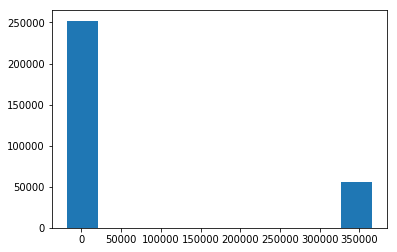

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

In [4]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
(app_train["DAYS_EMPLOYED"]/365).describe()
plt.hist(app_train["DAYS_EMPLOYED"])
plt.show()
#不同的值有幾個計數
app_train["DAYS_EMPLOYED"].value_counts()

### 從上面的圖與數值可以看出, 365243 明顯是個奇怪的數值

In [5]:
anom = app_train[app_train["DAYS_EMPLOYED"] == 365243]
non_anom = app_train[app_train["DAYS_EMPLOYED"] != 365243]
#%0.2f 取到小數點後兩位
print("The non-anomalies default on %0.2f of loans" % (100 * non_anom['TARGET'].mean()))
print("The anomalies default on %0.2f of loans" % (100 * anom['TARGET'].mean()))
print("There are %d anomalous days of employment" % len(anom))

The non-anomalies default on 8.66 of loans
The anomalies default on 5.40 of loans
There are 55374 anomalous days of employment


False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


Text(0.5,0,'Days Employment')

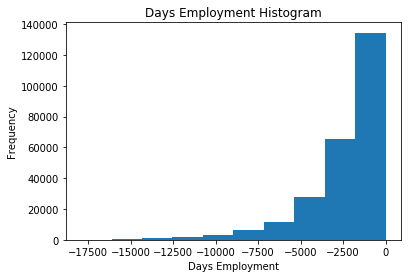

In [6]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train["DAYS_EMPLOYED_ANOM"].value_counts())

#這na取代異常值
app_train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

app_train["DAYS_EMPLOYED"].plot.hist(title = "Days Employment Histogram")
plt.xlabel("Days Employment")

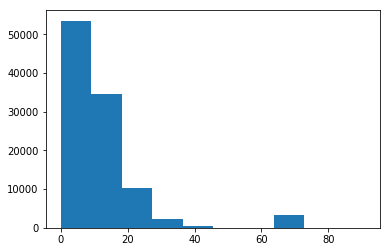

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
        ... 
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
69.0       1
48.0       1
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [7]:
# 檢查 OWN_CAR_AGE: 貸款人的車齡
# ~ -> 不包含 
plt.hist(app_train[~app_train.OWN_CAR_AGE.isnull()]["OWN_CAR_AGE"])
plt.show()
app_train["OWN_CAR_AGE"].value_counts()

In [8]:
app_train[app_train["OWN_CAR_AGE"] > 50]["OWN_CAR_AGE"].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

### 從上面我們可以發現車齡為 64, 65 的人特別多，是否合理?
* 記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [10]:
print("Target of OWN_CAR_AGE >= 50: %.2f" % (app_train[app_train["OWN_CAR_AGE"] >= 50 ]["TARGET"].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f" % (app_train[app_train["OWN_CAR_AGE"] < 50]["TARGET"].mean() * 100))
# 新增一個欄位: OWN_CAR_AGE_ANOM 來標記 OWN_CAR_AGE 是否異常
app_train["OWN_CAR_AGE_ANOM"] = app_train["OWN_CAR_AGE"] >= 50

Target of OWN_CAR_AGE >= 50: 8.36
Target of OWN_CAR_AGE < 50: 7.21


#### 作業

In [11]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = "../data/"

In [12]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [13]:
pd.read_csv('../data/HomeCredit_columns_description.csv',encoding='latin1')

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


Numbers of remain columns 73
SK_ID_CURR


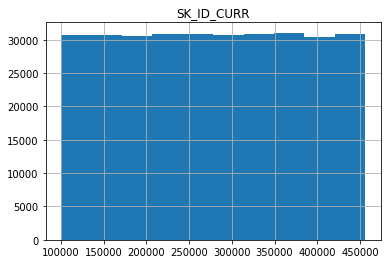

CNT_CHILDREN


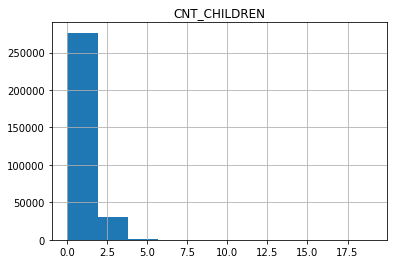

AMT_INCOME_TOTAL


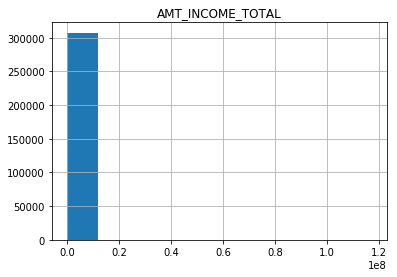

AMT_CREDIT


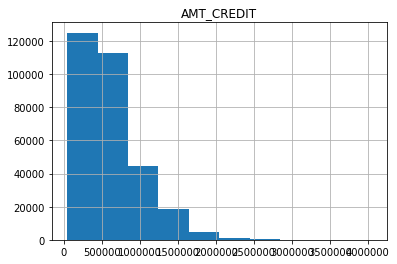

AMT_ANNUITY


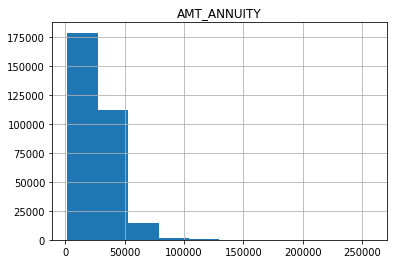

AMT_GOODS_PRICE


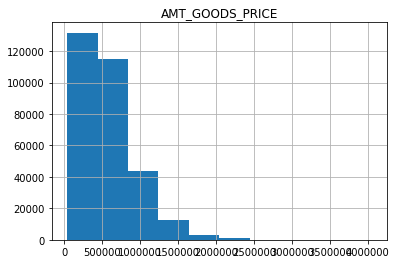

REGION_POPULATION_RELATIVE


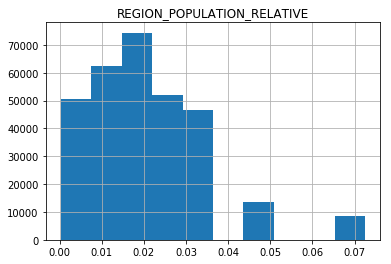

DAYS_BIRTH


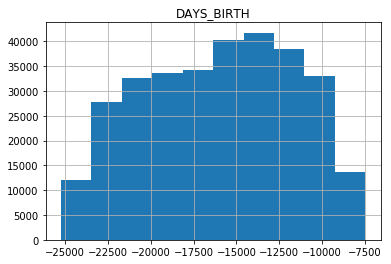

DAYS_EMPLOYED


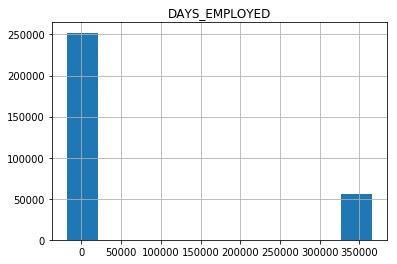

DAYS_REGISTRATION


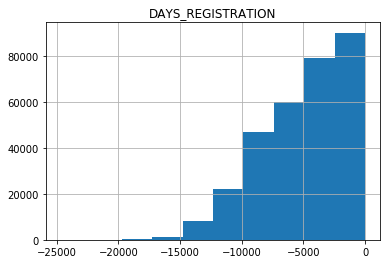

DAYS_ID_PUBLISH


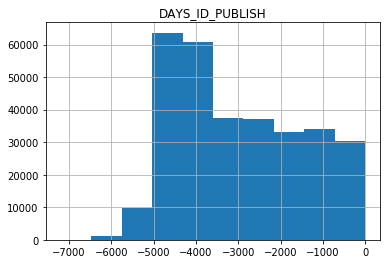

OWN_CAR_AGE


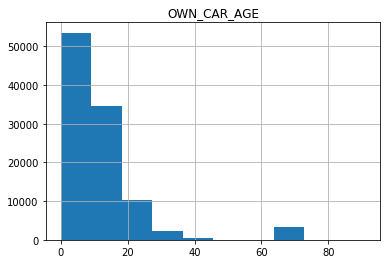

CNT_FAM_MEMBERS


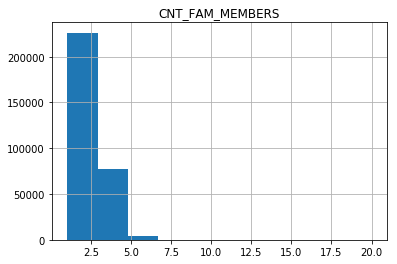

REGION_RATING_CLIENT


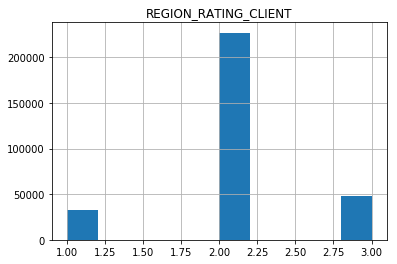

REGION_RATING_CLIENT_W_CITY


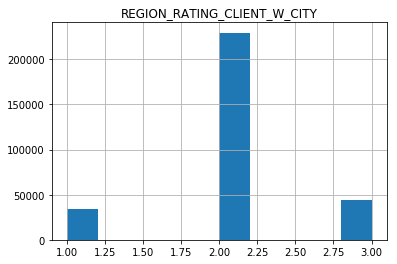

HOUR_APPR_PROCESS_START


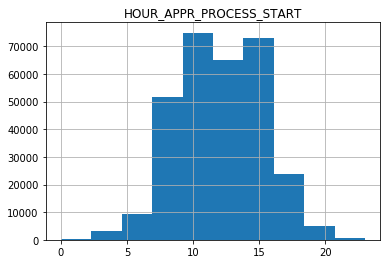

EXT_SOURCE_1


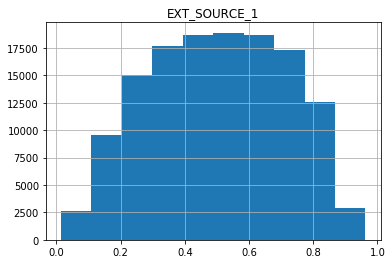

EXT_SOURCE_2


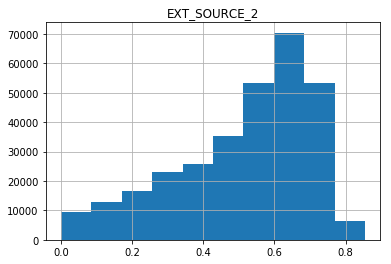

EXT_SOURCE_3


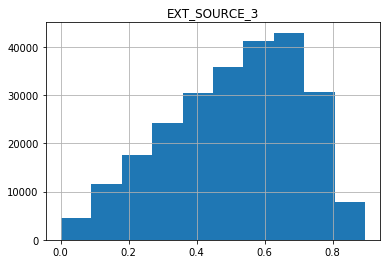

APARTMENTS_AVG


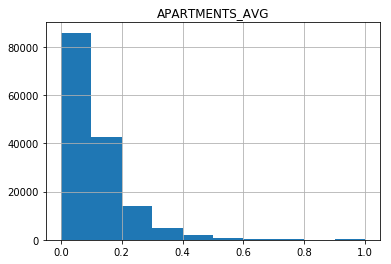

BASEMENTAREA_AVG


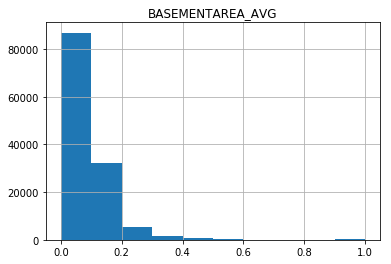

YEARS_BEGINEXPLUATATION_AVG


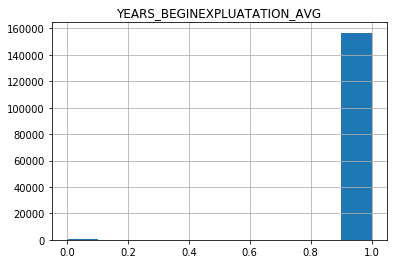

YEARS_BUILD_AVG


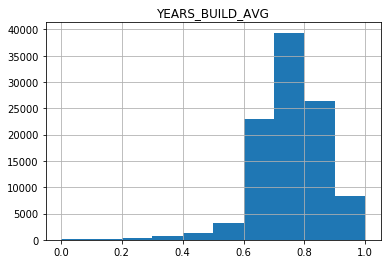

COMMONAREA_AVG


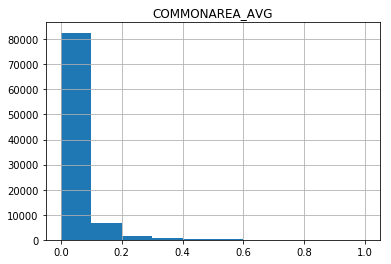

ELEVATORS_AVG


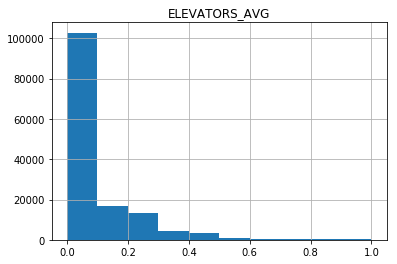

ENTRANCES_AVG


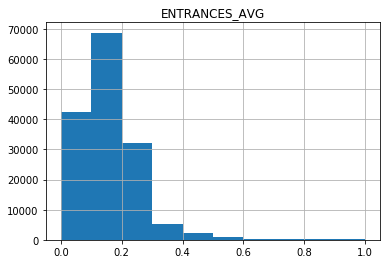

FLOORSMAX_AVG


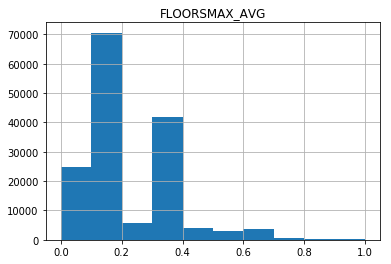

FLOORSMIN_AVG


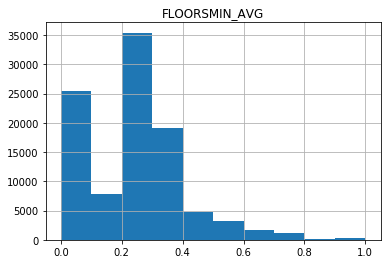

LANDAREA_AVG


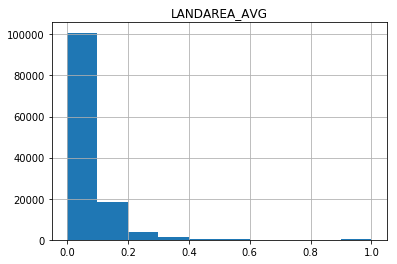

LIVINGAPARTMENTS_AVG


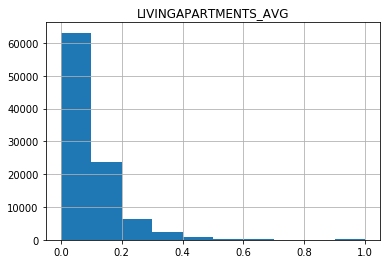

LIVINGAREA_AVG


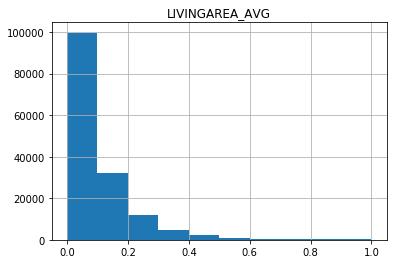

NONLIVINGAPARTMENTS_AVG


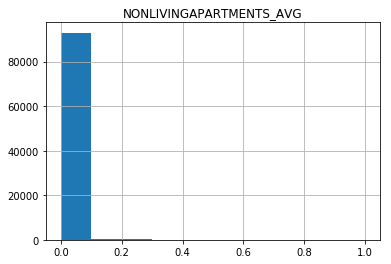

NONLIVINGAREA_AVG


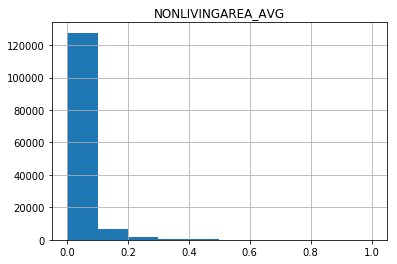

APARTMENTS_MODE


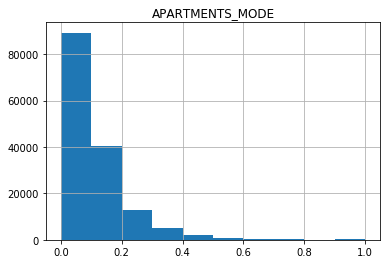

BASEMENTAREA_MODE


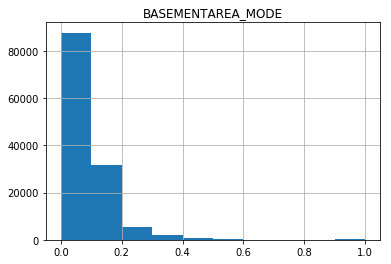

YEARS_BEGINEXPLUATATION_MODE


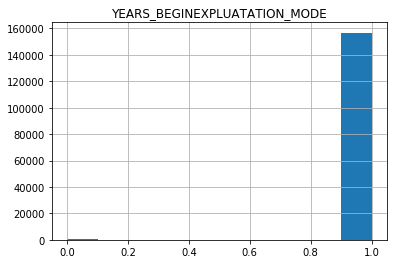

YEARS_BUILD_MODE


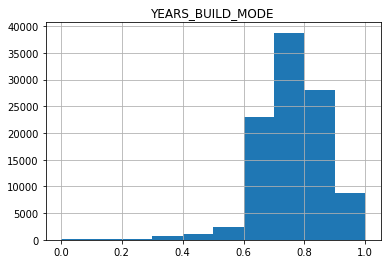

COMMONAREA_MODE


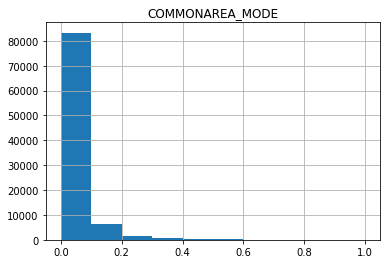

ELEVATORS_MODE


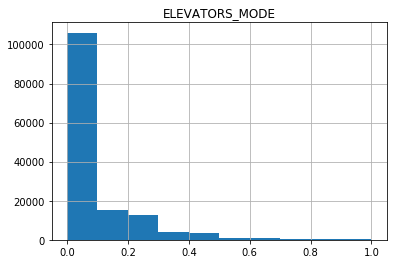

ENTRANCES_MODE


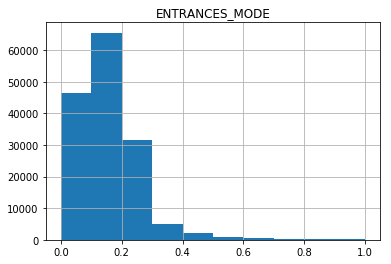

FLOORSMAX_MODE


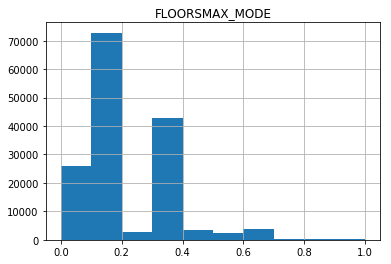

FLOORSMIN_MODE


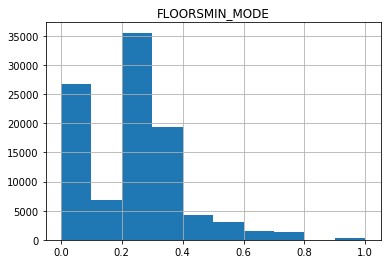

LANDAREA_MODE


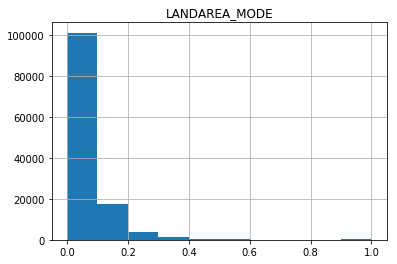

LIVINGAPARTMENTS_MODE


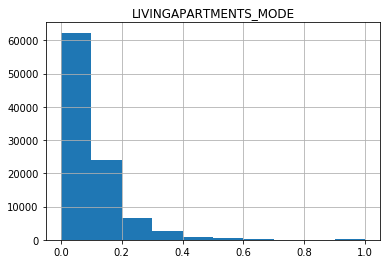

LIVINGAREA_MODE


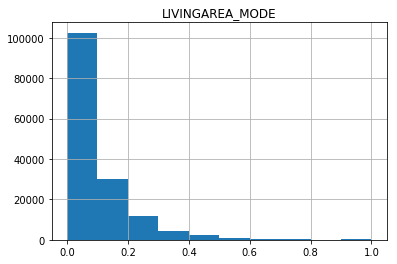

NONLIVINGAPARTMENTS_MODE


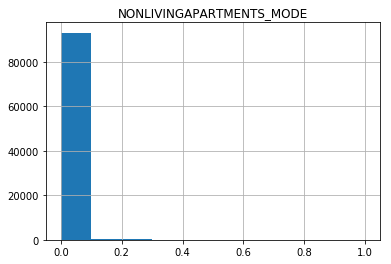

NONLIVINGAREA_MODE


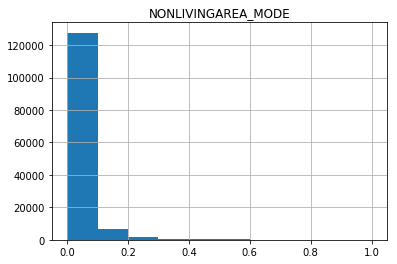

APARTMENTS_MEDI


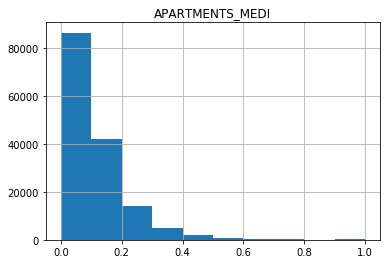

BASEMENTAREA_MEDI


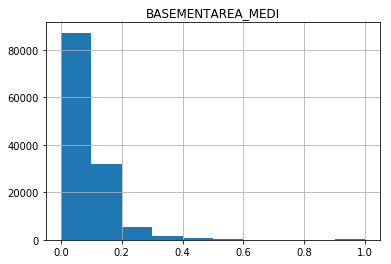

YEARS_BEGINEXPLUATATION_MEDI


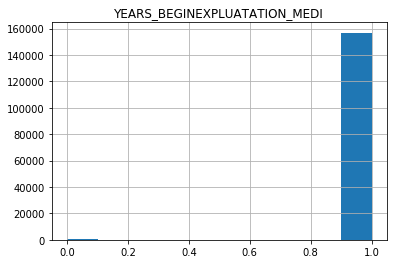

YEARS_BUILD_MEDI


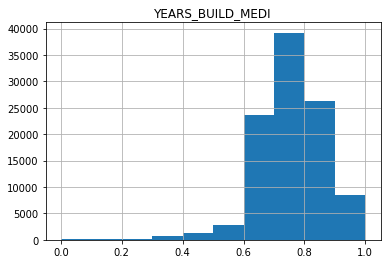

COMMONAREA_MEDI


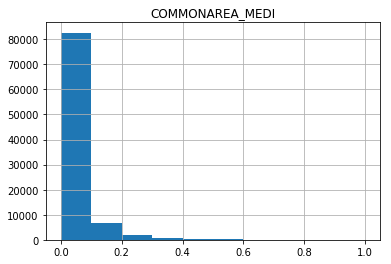

ELEVATORS_MEDI


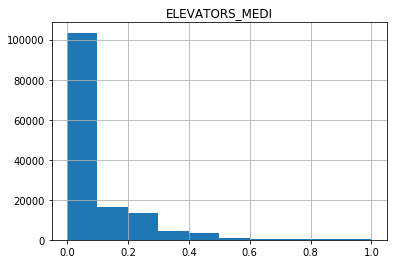

ENTRANCES_MEDI


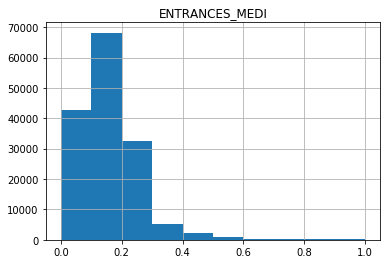

FLOORSMAX_MEDI


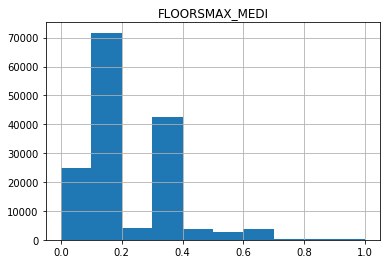

FLOORSMIN_MEDI


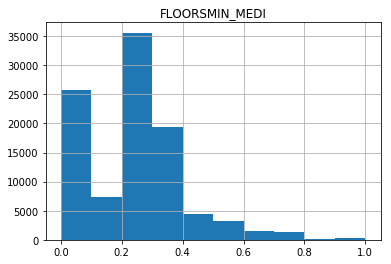

LANDAREA_MEDI


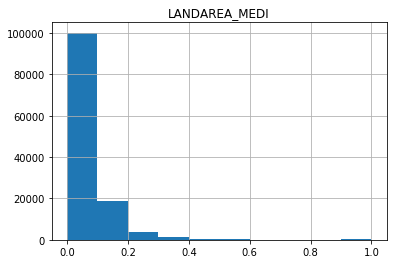

LIVINGAPARTMENTS_MEDI


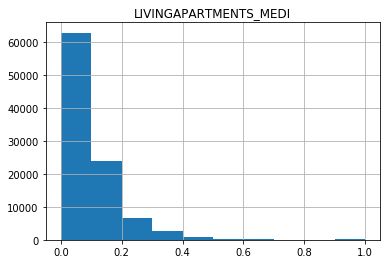

LIVINGAREA_MEDI


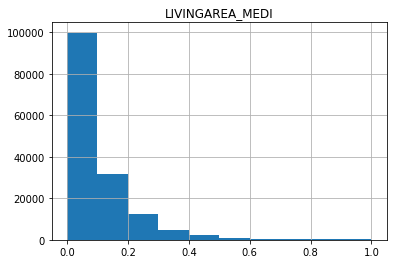

NONLIVINGAPARTMENTS_MEDI


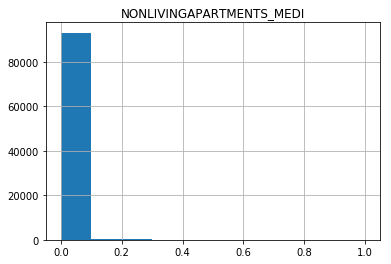

NONLIVINGAREA_MEDI


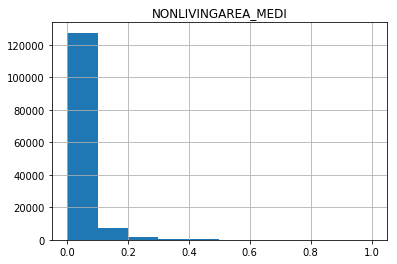

TOTALAREA_MODE


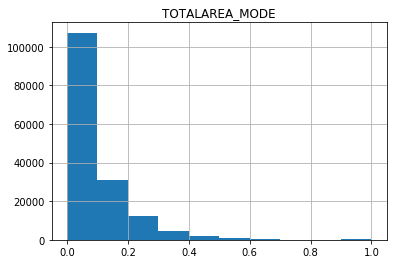

OBS_30_CNT_SOCIAL_CIRCLE


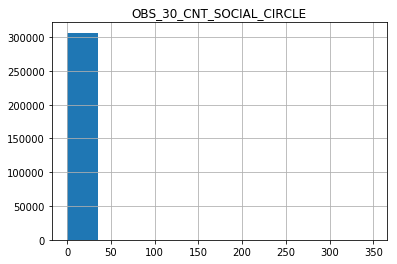

DEF_30_CNT_SOCIAL_CIRCLE


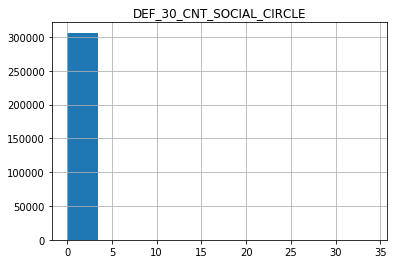

OBS_60_CNT_SOCIAL_CIRCLE


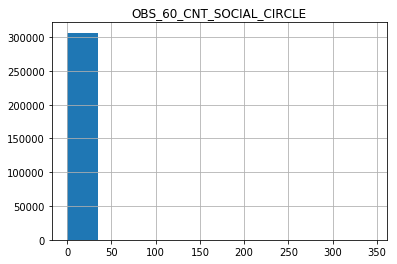

DEF_60_CNT_SOCIAL_CIRCLE


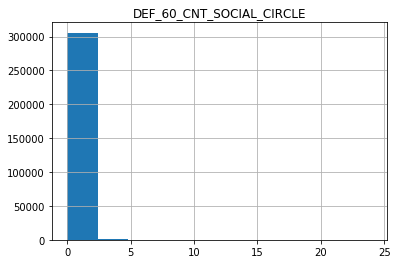

DAYS_LAST_PHONE_CHANGE


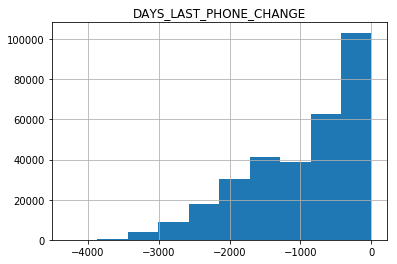

AMT_REQ_CREDIT_BUREAU_HOUR


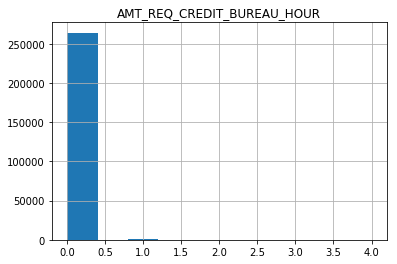

AMT_REQ_CREDIT_BUREAU_DAY


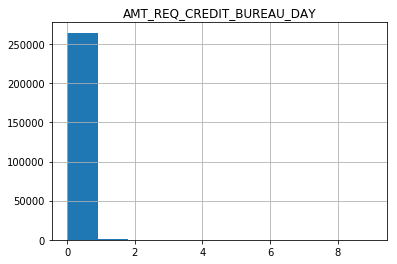

AMT_REQ_CREDIT_BUREAU_WEEK


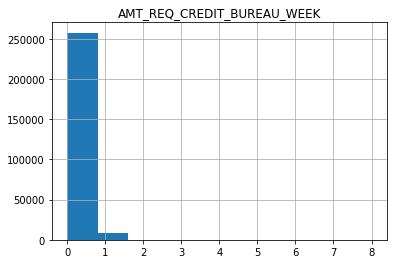

AMT_REQ_CREDIT_BUREAU_MON


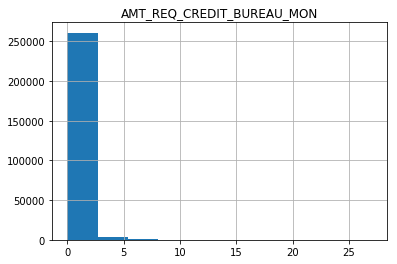

AMT_REQ_CREDIT_BUREAU_QRT


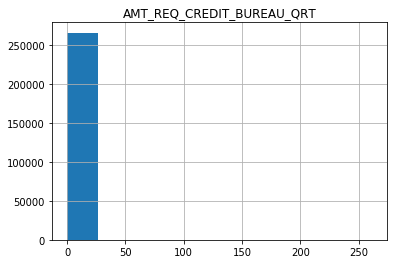

AMT_REQ_CREDIT_BUREAU_YEAR


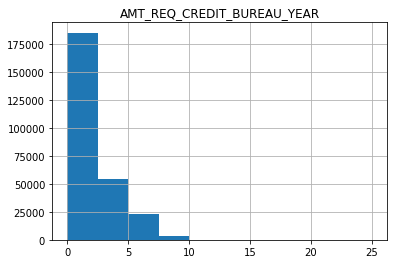

In [14]:
#做法一
# 先篩選數值型的欄位
numeric = app_train.select_dtypes(exclude=['object'])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric = numeric.loc[:,numeric.nunique()>2]
print("Numbers of remain columns %d" % len(numeric.columns))

# 檢視這些欄位的數值範圍
for col in numeric:
    print(col)
    ax = app_train[col].hist()
    ax.set_title(col)
    plt.show()

Numbers of remain columns 73
SK_ID_CURR  範圍 ：  100002 ~ 456255


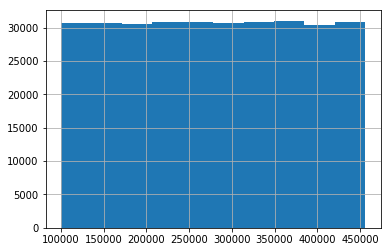

CNT_CHILDREN  範圍 ：  0 ~ 19


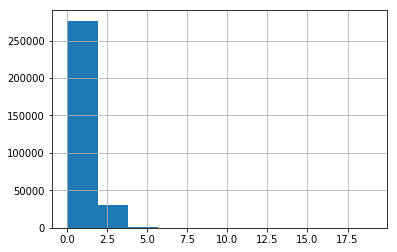

AMT_INCOME_TOTAL  範圍 ：  25650.0 ~ 117000000.0


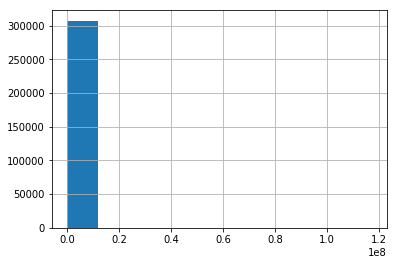

AMT_CREDIT  範圍 ：  45000.0 ~ 4050000.0


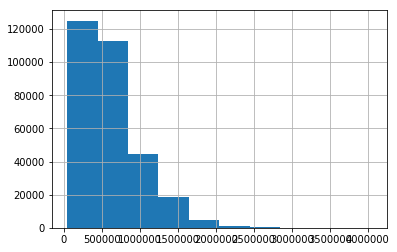

AMT_ANNUITY  範圍 ：  1615.5 ~ 258025.5


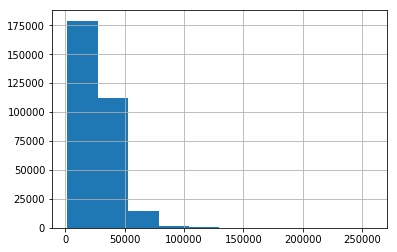

AMT_GOODS_PRICE  範圍 ：  40500.0 ~ 4050000.0


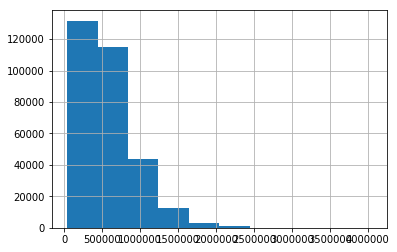

REGION_POPULATION_RELATIVE  範圍 ：  0.00029 ~ 0.072508


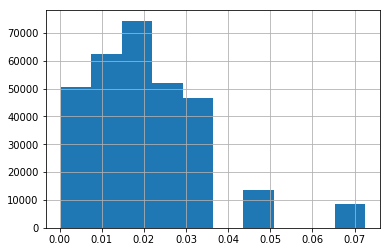

DAYS_BIRTH  範圍 ：  -25229 ~ -7489


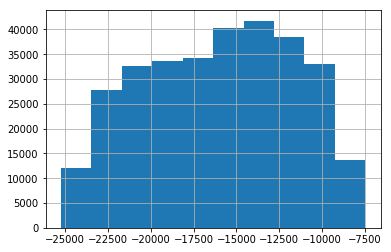

DAYS_EMPLOYED  範圍 ：  -17912 ~ 365243


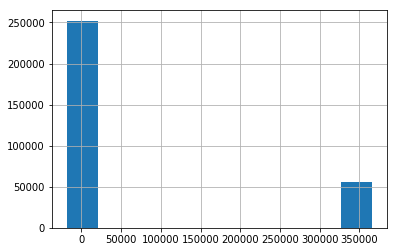

DAYS_REGISTRATION  範圍 ：  -24672.0 ~ 0.0


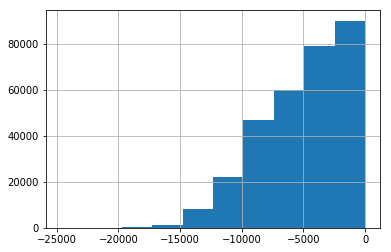

DAYS_ID_PUBLISH  範圍 ：  -7197 ~ 0


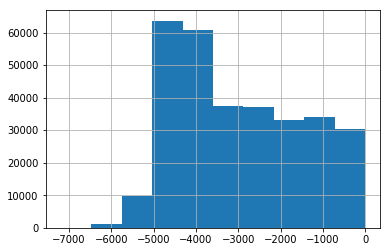

OWN_CAR_AGE  範圍 ：  0.0 ~ 91.0


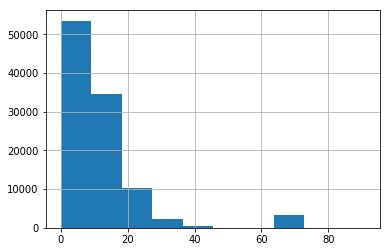

CNT_FAM_MEMBERS  範圍 ：  1.0 ~ 20.0


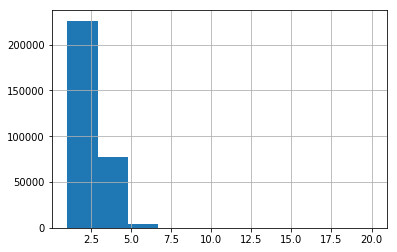

REGION_RATING_CLIENT  範圍 ：  1 ~ 3


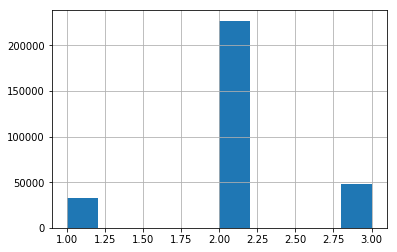

REGION_RATING_CLIENT_W_CITY  範圍 ：  1 ~ 3


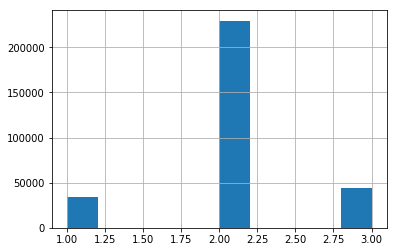

HOUR_APPR_PROCESS_START  範圍 ：  0 ~ 23


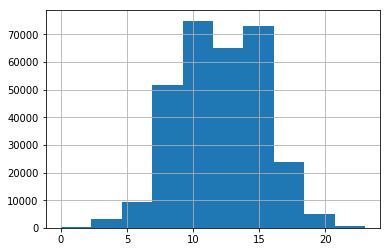

EXT_SOURCE_1  範圍 ：  0.014568132412445587 ~ 0.962692770561306


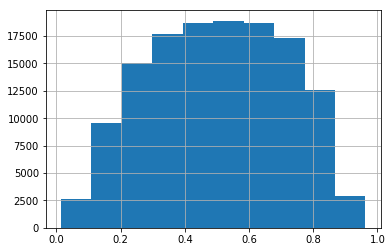

EXT_SOURCE_2  範圍 ：  8.173616518884397e-08 ~ 0.8549996664047012


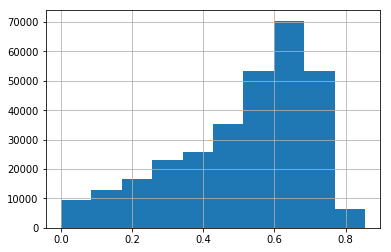

EXT_SOURCE_3  範圍 ：  0.0005272652387098817 ~ 0.8960095494948396


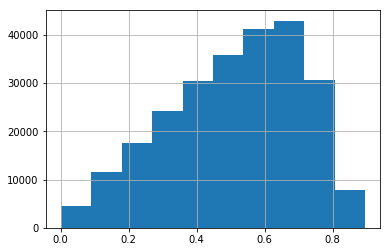

APARTMENTS_AVG  範圍 ：  0.0 ~ 1.0


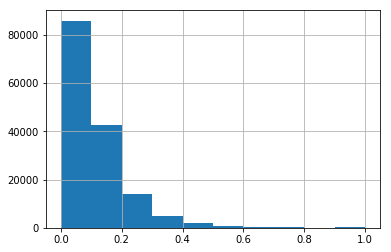

BASEMENTAREA_AVG  範圍 ：  0.0 ~ 1.0


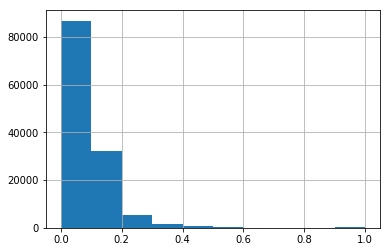

YEARS_BEGINEXPLUATATION_AVG  範圍 ：  0.0 ~ 1.0


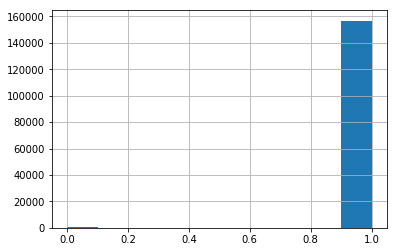

YEARS_BUILD_AVG  範圍 ：  0.0 ~ 1.0


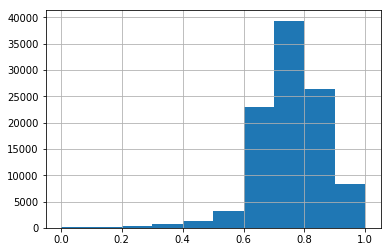

COMMONAREA_AVG  範圍 ：  0.0 ~ 1.0


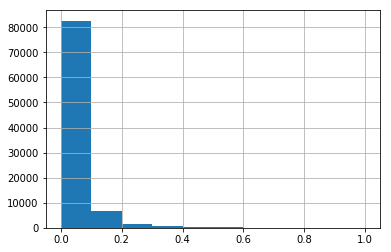

ELEVATORS_AVG  範圍 ：  0.0 ~ 1.0


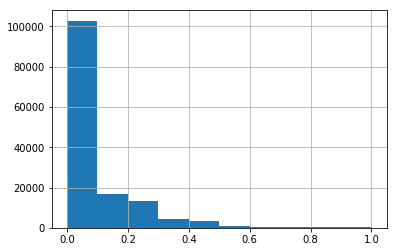

ENTRANCES_AVG  範圍 ：  0.0 ~ 1.0


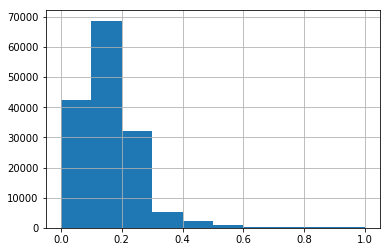

FLOORSMAX_AVG  範圍 ：  0.0 ~ 1.0


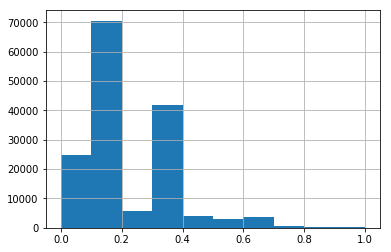

FLOORSMIN_AVG  範圍 ：  0.0 ~ 1.0


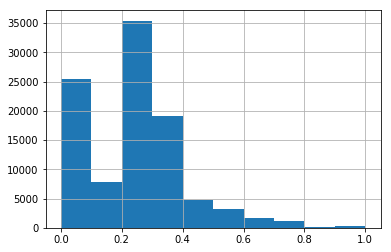

LANDAREA_AVG  範圍 ：  0.0 ~ 1.0


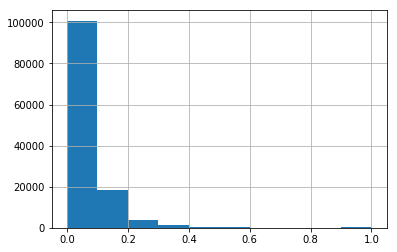

LIVINGAPARTMENTS_AVG  範圍 ：  0.0 ~ 1.0


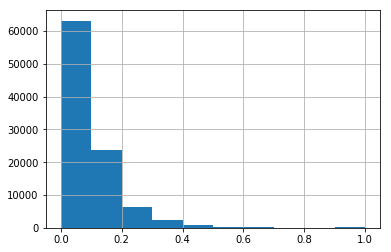

LIVINGAREA_AVG  範圍 ：  0.0 ~ 1.0


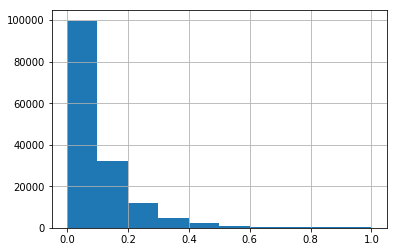

NONLIVINGAPARTMENTS_AVG  範圍 ：  0.0 ~ 1.0


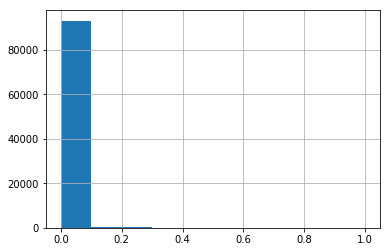

NONLIVINGAREA_AVG  範圍 ：  0.0 ~ 1.0


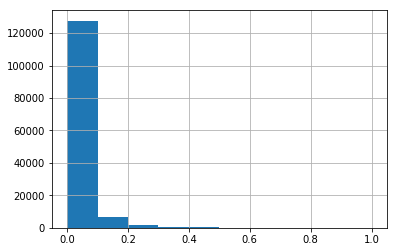

APARTMENTS_MODE  範圍 ：  0.0 ~ 1.0


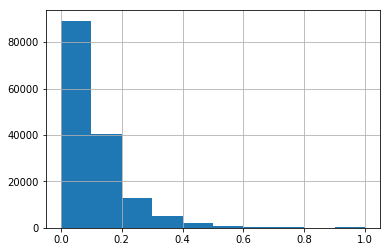

BASEMENTAREA_MODE  範圍 ：  0.0 ~ 1.0


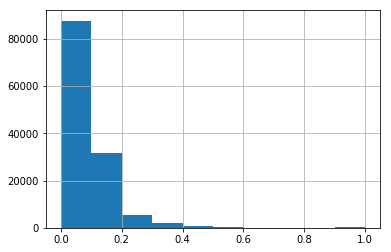

YEARS_BEGINEXPLUATATION_MODE  範圍 ：  0.0 ~ 1.0


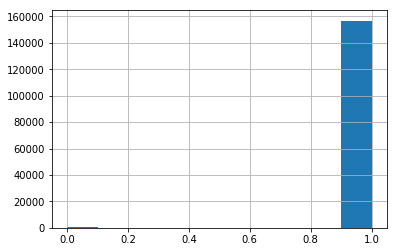

YEARS_BUILD_MODE  範圍 ：  0.0 ~ 1.0


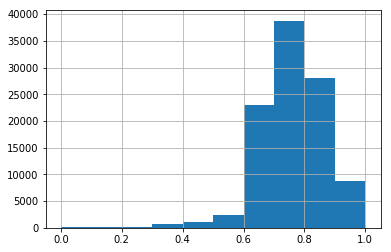

COMMONAREA_MODE  範圍 ：  0.0 ~ 1.0


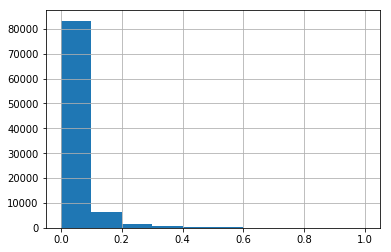

ELEVATORS_MODE  範圍 ：  0.0 ~ 1.0


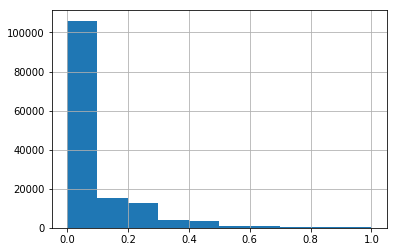

ENTRANCES_MODE  範圍 ：  0.0 ~ 1.0


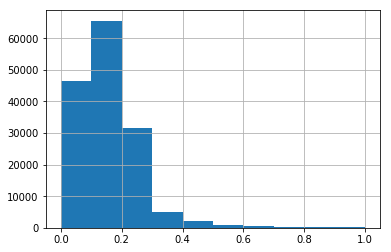

FLOORSMAX_MODE  範圍 ：  0.0 ~ 1.0


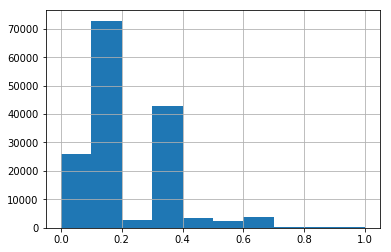

FLOORSMIN_MODE  範圍 ：  0.0 ~ 1.0


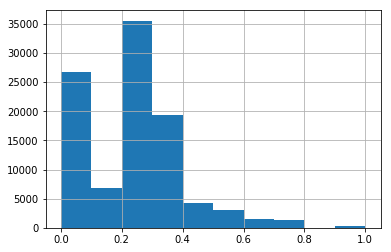

LANDAREA_MODE  範圍 ：  0.0 ~ 1.0


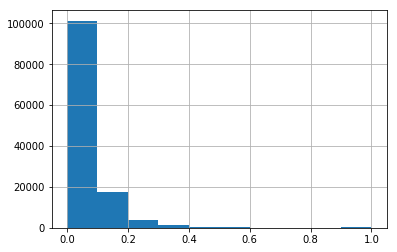

LIVINGAPARTMENTS_MODE  範圍 ：  0.0 ~ 1.0


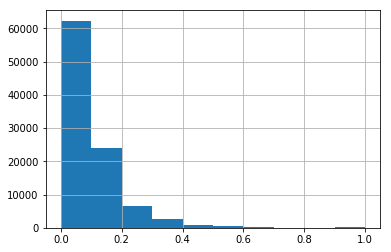

LIVINGAREA_MODE  範圍 ：  0.0 ~ 1.0


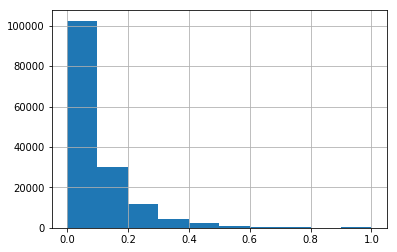

NONLIVINGAPARTMENTS_MODE  範圍 ：  0.0 ~ 1.0


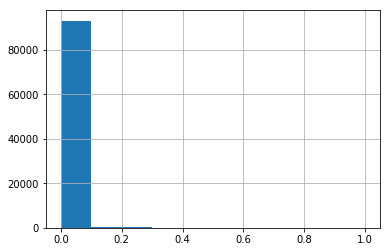

NONLIVINGAREA_MODE  範圍 ：  0.0 ~ 1.0


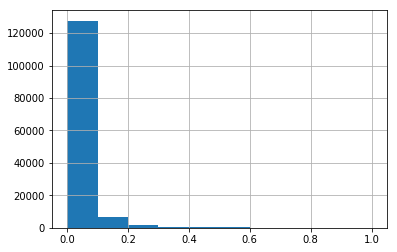

APARTMENTS_MEDI  範圍 ：  0.0 ~ 1.0


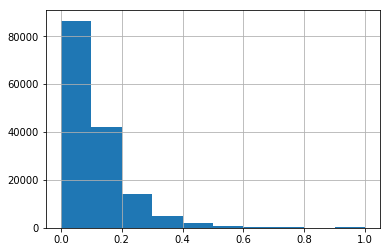

BASEMENTAREA_MEDI  範圍 ：  0.0 ~ 1.0


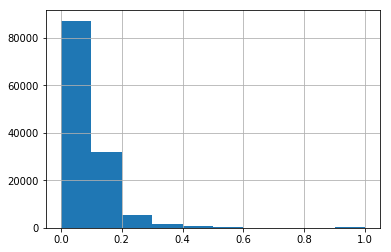

YEARS_BEGINEXPLUATATION_MEDI  範圍 ：  0.0 ~ 1.0


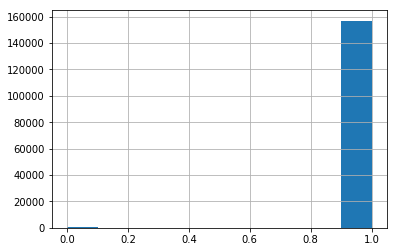

YEARS_BUILD_MEDI  範圍 ：  0.0 ~ 1.0


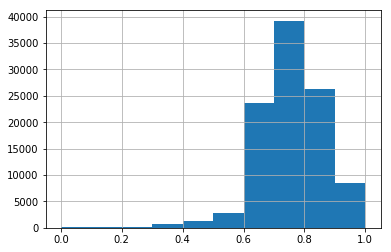

COMMONAREA_MEDI  範圍 ：  0.0 ~ 1.0


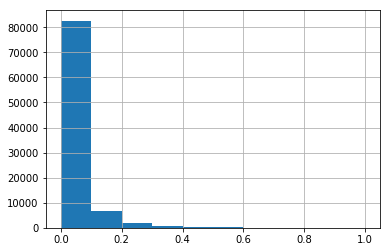

ELEVATORS_MEDI  範圍 ：  0.0 ~ 1.0


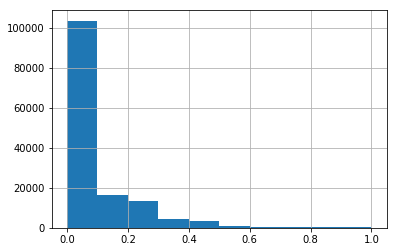

ENTRANCES_MEDI  範圍 ：  0.0 ~ 1.0


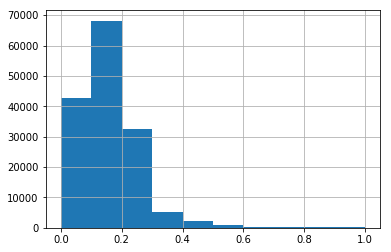

FLOORSMAX_MEDI  範圍 ：  0.0 ~ 1.0


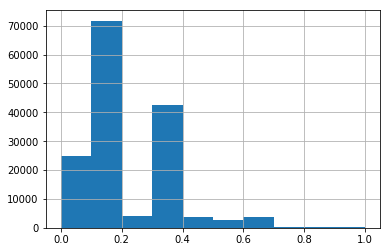

FLOORSMIN_MEDI  範圍 ：  0.0 ~ 1.0


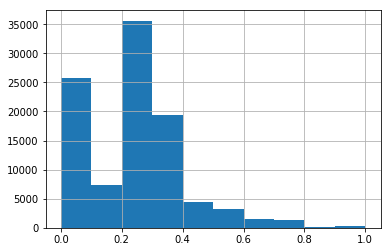

LANDAREA_MEDI  範圍 ：  0.0 ~ 1.0


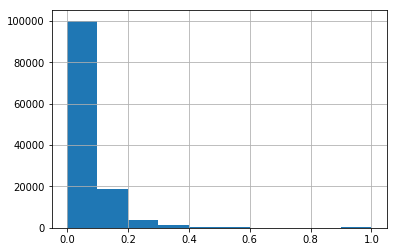

LIVINGAPARTMENTS_MEDI  範圍 ：  0.0 ~ 1.0


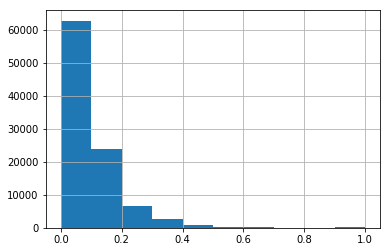

LIVINGAREA_MEDI  範圍 ：  0.0 ~ 1.0


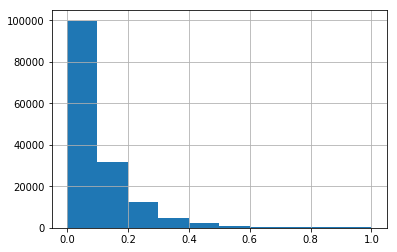

NONLIVINGAPARTMENTS_MEDI  範圍 ：  0.0 ~ 1.0


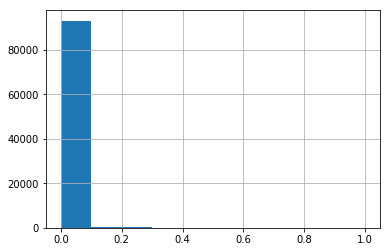

NONLIVINGAREA_MEDI  範圍 ：  0.0 ~ 1.0


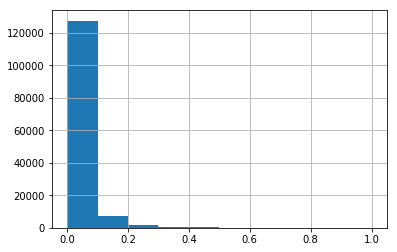

TOTALAREA_MODE  範圍 ：  0.0 ~ 1.0


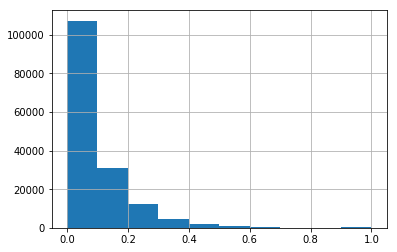

OBS_30_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 ~ 348.0


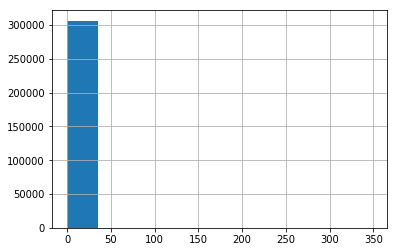

DEF_30_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 ~ 34.0


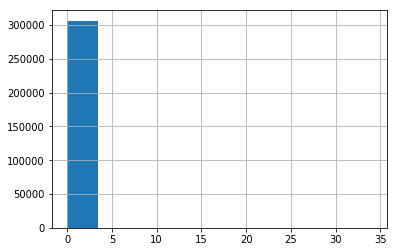

OBS_60_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 ~ 344.0


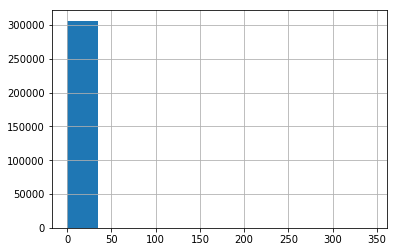

DEF_60_CNT_SOCIAL_CIRCLE  範圍 ：  0.0 ~ 24.0


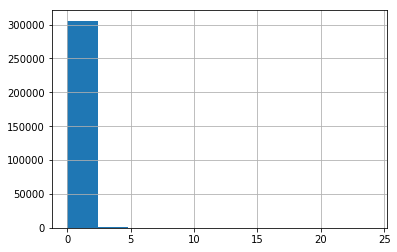

DAYS_LAST_PHONE_CHANGE  範圍 ：  -4292.0 ~ 0.0


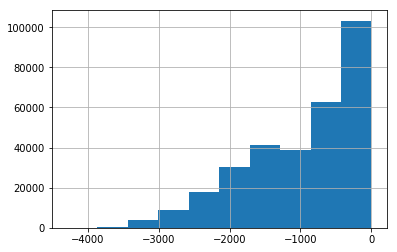

AMT_REQ_CREDIT_BUREAU_HOUR  範圍 ：  0.0 ~ 4.0


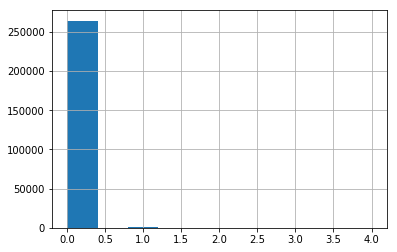

AMT_REQ_CREDIT_BUREAU_DAY  範圍 ：  0.0 ~ 9.0


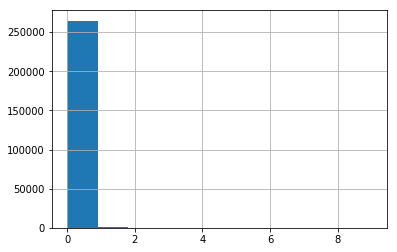

AMT_REQ_CREDIT_BUREAU_WEEK  範圍 ：  0.0 ~ 8.0


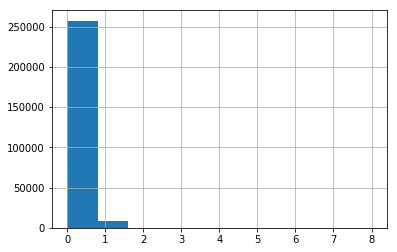

AMT_REQ_CREDIT_BUREAU_MON  範圍 ：  0.0 ~ 27.0


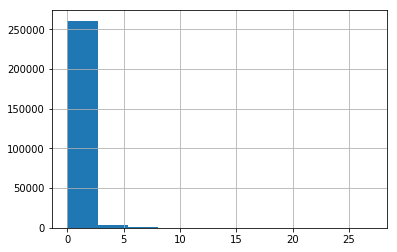

AMT_REQ_CREDIT_BUREAU_QRT  範圍 ：  0.0 ~ 261.0


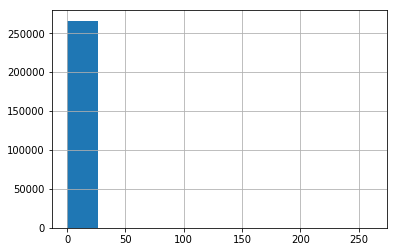

AMT_REQ_CREDIT_BUREAU_YEAR  範圍 ：  0.0 ~ 25.0


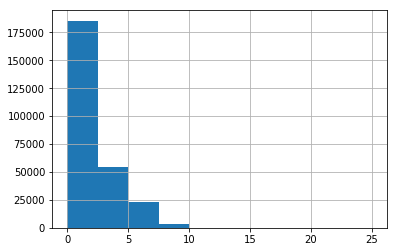

In [15]:
dtype_select = [np.dtype('float64'),np.dtype('int64')]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

#dtype_select = [np.dtype('object'),]
#numeric_columns = list(app_train.columns[list(~app_train.dtypes.isin(dtype_select))])

numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" , len(numeric_columns))

for col in numeric_columns:
    print(col," 範圍 ： ",app_train[col].min(),"~",app_train[col].max())
    # plt.boxplot(app_train[col][~np.isnan(app_train[col])])
    app_train[col].hist()
    plt.show()

In [16]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

#DAYS_EMPLOYED  
#OWN_CAR_AGE
#REGION_RATING_CLIENT  
#REGION_RATING_CLIENT_W_CITY  
#YEARS_BEGINEXPLUATATION_AVG  
#FLOORSMAX_AVG  
#YEARS_BEGINEXPLUATATION_MODE 
#FLOORSMAX_MODE  #YEARS_BEGINEXPLUATATION_MEDI  

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)
* y軸20%的人對應到X軸的數字

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


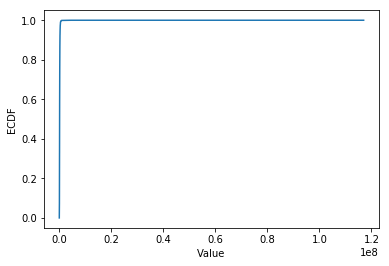

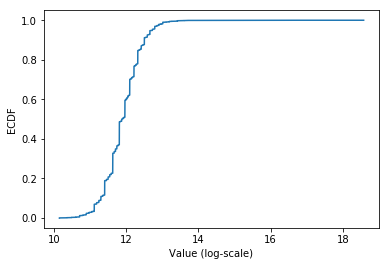

In [17]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

#小到大排序
x = np.sort(app_train['AMT_INCOME_TOTAL'])
#np.arange(1,10)/10
y = np.arange(1,len(x)+1)/len(x)
#_ = plt.plot(x,y,marker=",",linestyle="none")
_ = plt.plot(x,y)
_ = plt.xlabel('Value')
_ = plt.ylabel('ECDF')
plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(x)), y/y.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

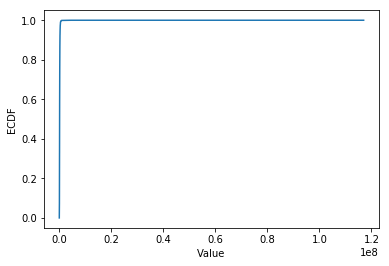

C:\Users\wen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


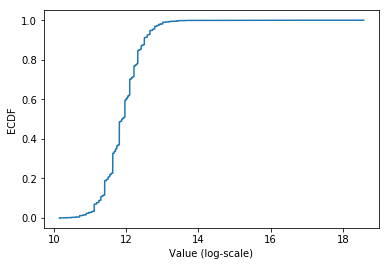

In [18]:
#做法2
from statsmodels.distributions.empirical_distribution import ECDF
cdf=ECDF(app_train['AMT_INCOME_TOTAL'])

plt.plot(cdf.x, cdf.y/cdf.y.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
# plt.xlim([cdf.y.min(), cdf.y.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.x)), cdf.y/cdf.y.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

#plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


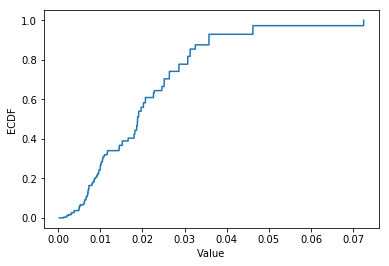

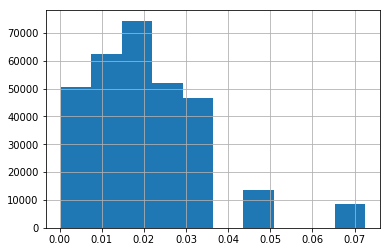

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [19]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
hist = np.histogram(app_train['REGION_POPULATION_RELATIVE'],1000000)
cdf = pd.Series(hist[0], index = (hist[1][:-1]+hist[1][1:])/2).cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


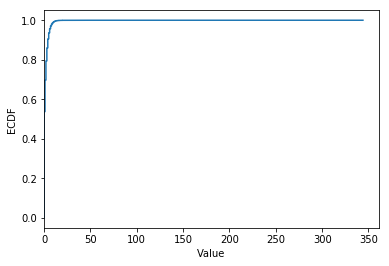

C:\Users\wen\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


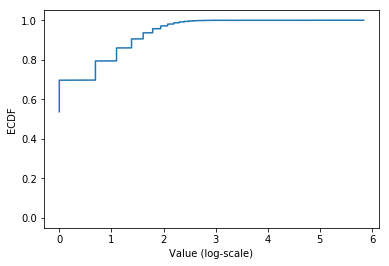

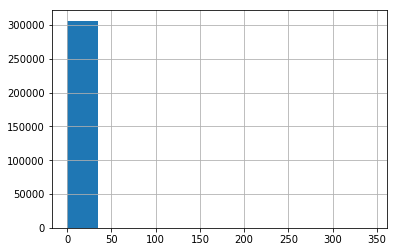

In [20]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = ECDF(app_train['OBS_60_CNT_SOCIAL_CIRCLE'][~np.isnan(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])],side='right')
cdf_x = cdf.x[1:]
cdf_y = cdf.y[1:]

plt.plot(list(cdf_x), cdf_y/cdf_y.max())

plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf_x.min() * 0.95, cdf_x.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

plt.plot(np.log(list(cdf_x)), cdf_y/cdf_y.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [21]:
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


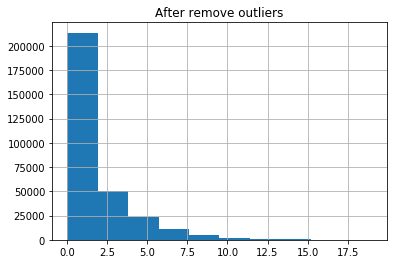

In [22]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製

loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.title('After remove outliers')
plt.show()